# MNIST classification using a SGD classifier and Scikit-Learn functions

### A few packages to get you going
* We'll be loading many more throughout the tutorial
* Download the dataset by executing the proceeding cells

In [51]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

In [52]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

* Print dictionary keys

In [53]:
for key in mnist:
    print(key)

data
target
frame
categories
feature_names
target_names
DESCR
details
url


* Save the contents of the data and target from the MNIST dictionary into data_array and target array variables
    * Also print out the shape of data_array
* Notice the type of the target array – convert this to np.uint8 using the astype() method

In [54]:
#saving the contents of data and target as data_array and target_array
data_array = mnist.data
target_array = mnist.target

In [55]:
#printing the shape of the data_array
print(data_array.shape)

(70000, 784)


In [56]:
#printing the target_array data type: dtype ('0') means 'object'
target_array.dtype

dtype('O')

In [57]:
#convert the target_array to np.uint8 using the astype() method
target_array = target_array.astype(np.uint8)
print(target_array.dtype)

uint8


* Print and glance over the description given in the mnist dictionary
* Plot an image of the very first image in the dataset (matplotlib imshow)

* Bonus ACTIVITY: Write a function that takes in the index of a sample and plots it


In [58]:
#print and glance over the description given in the mnist dictionary
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

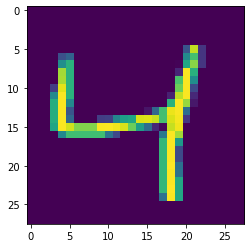

In [59]:
#first convert the data from 1D to 2D of the very first image
data_array_2d = data_array[2].reshape(28,28)

#plot an image of the very first image in the dataset (matplotlib imshow)
plt.imshow(data_array_2d)

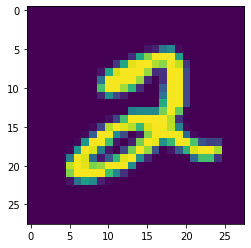

In [60]:
#creating function that takes in the index of the sample and plots it
def index_plot(i):
    plt.imshow(data_array[i].reshape(28,28), aspect = 'equal')

index_plot(5)

### train_test_split
* turn off shuffle

In [61]:
#using Sklearn train test split function
#don't need shuffle for this so set it to False
#everything else is set to none (can remove all of these to make it cleaner, the only ones you actually need for the function to run is shuffle false)
#can adjust either the test_size or the target_size (but only one) with a number between 0 and 1 for how much of the data you want to include in each subset
#you can also use a number for test_size e.g. 3500 (in this example the size is 7000 so that is the equivalent of 50%)
#then print the shapes of the new arrays you've created

data_array_train, data_array_test, target_array_train, target_array_test = train_test_split(data_array,target_array,shuffle=False)

print(data_array_train.shape, data_array_test.shape, target_array_train.shape, target_array_test.shape)

(52500, 784) (17500, 784) (52500,) (17500,)


### Make a new target array (for only train dataset) that is composed of Boolean values (True for 5s and False for not 5s)
* Name the new array target_array_train_5


In [62]:
#to say not equals use '!=' instead of '=='

target_array_train_5 = (target_array_train == 5)
print(target_array_train[0:10])
print(target_array_train_5[0:10])

[5 0 4 1 9 2 1 3 1 4]
[ True False False False False False False False False False]


### SGDClassifier
* Name it sgd_clf
* Fit the model to the data with the fives target
* Check to see if it worked using the predict function on a specific sample you know is a 5; also a sample you know is not a 5
    * Individual predictions will require a reshape (necessary command will appear in error)


In [63]:
#SGDCLassifier skylearn function to fit a linear model
#import SGD classifier, StandardScaler and pipeline

from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [64]:
#fit the model to the data with the fives target

sgd_clf = SGDClassifier(loss='hinge', max_iter=1000)
sgd_clf.fit(data_array_train,target_array_train_5)

SGDClassifier()

In [65]:
#use the predict function to check if it worked, by specifying individual sample you know is a 5

sgd_clf.predict(data_array_train[0:10])

#to predict one value need to reshape, -1 means put in whatever number you need to make this work
sgd_clf.predict(data_array_train[0].reshape(1,-1))

array([ True])

### cross_val_score
* Implement it using 3-fold cross validation, scoring for accuracy


In [66]:
#import cross val score and metrics for scoring

from sklearn.model_selection import cross_val_score

In [67]:
#implement cross val score using 3-fold cross validation, scoring for accuracy

scores = cross_val_score(sgd_clf, data_array_train, target_array_train_5, cv=3, scoring='accuracy')
scores

array([0.96782857, 0.97011429, 0.9616    ])

### Calculate the accuracy if the model always predicted not-5


In [68]:
#calculating all the values that are true i.e value is 5

all_true = sum(target_array_train_5)
all_true, target_array_train_5.shape

(4739, (52500,))

In [69]:
#calculating the accuracy if the model always predicted not 5
#to do this want to calculate the number of 5's within the array
#then calculate the percentage if the model always predicted not 5 (percentage: how many 5's over how many values)

accuracy_not_5 = 100-((all_true/52500)*100)
accuracy_not_5

90.97333333333333

### cross_val_predict 
* Name the array of predictions target_array_train_5_pred

In [70]:
#install cross_val_predict

from sklearn.model_selection import cross_val_predict

In [71]:
#perform cross_val_predict. Use cv=3 (3-fold cross validation) as before for cross_val_score

target_array_train_5_pred = cross_val_predict(sgd_clf, data_array_train, target_array_train_5, cv=3)
target_array_train_5_pred

array([ True, False, False, ..., False, False, False])

### precision_score; recall_score

In [ ]:
#precision score=true positive/(true positive+false positive)
#recall score= true positive/(true positive+false negative)

In [72]:
#import precision_score
from sklearn.metrics import precision_score

In [73]:
#generating precision score using the precision score function
precision_score = precision_score(target_array_train_5, target_array_train_5_pred)
precision_score

0.7830551989730423

In [74]:
#import recall_score
from sklearn.metrics import recall_score

In [75]:
#generating recall score using the recall score function
recall_score = recall_score(target_array_train_5, target_array_train_5_pred)
recall_score

0.7723148343532391

### roc_curve
* Run cross_val_predict as before, but add method='decision_function'
* Use matplotlib plot to create ROC curve figure

In [76]:
#run cross_val_predict adding method='decision_function'

target_array_train_5_pred = cross_val_predict(sgd_clf, data_array_train, target_array_train_5, cv=3, method='decision_function')
target_array_train_5_pred

array([  8441.99614964, -37921.01538463, -54682.87249884, ...,
       -13663.18826713, -12184.99141456, -20106.73860922])

In [77]:
#imports to create a ROC curve figure using matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

In [78]:
#make roc curve
fpr, tpr, thresholds = metrics.roc_curve(target_array_train_5, target_array_train_5_pred)
fpr, tpr, thresholds

(array([0.       , 0.       , 0.       , ..., 0.9960428, 0.9960428,
        1.       ]),
 array([0.00000000e+00, 2.11014982e-04, 3.37623971e-03, ...,
        9.99788985e-01, 1.00000000e+00, 1.00000000e+00]),
 array([  50128.60071958,   50127.60071958,   38858.0346057 , ...,
        -116970.36867667, -117144.6711945 , -266955.25442076]))

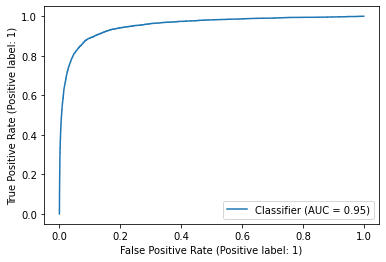

In [79]:
#make a roc chart using the RocCurveDisplay.from_predictions function 
#plt.show displays the figure

rocchart = metrics.RocCurveDisplay.from_predictions(target_array_train_5, target_array_train_5_pred)
plt.show(rocchart)

### roc_auc_score

In [80]:
#import roc_auc_score
from sklearn.metrics import roc_auc_score

roc_auc_score = metrics.roc_auc_score(target_array_train_5, target_array_train_5_pred)
roc_auc_score

0.9537801550652837

### Find the cross_val_pred for the SGD classifier using all 10 classes (change targets)
* Use a new variable target_array_train_pred to save predictions 

In [81]:
#SGDCLassifier skylearn function to fit a linear model
#import SGD classifier

from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [82]:
#fit the model to the full dataset 

sgd_clf = SGDClassifier(loss='hinge', max_iter=1000)
sgd_clf.fit(data_array_train,target_array_train)

SGDClassifier()

In [84]:
#use the predict function to check if it worked

sgd_clf.predict(data_array_train[0:10])

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [85]:
#cross val score

scores_2 = cross_val_score(sgd_clf, data_array_train, target_array_train, cv=3)
scores_2

array([0.87142857, 0.87828571, 0.86931429])

In [90]:
#use cross_val_predict on the data array and target array datasets
target_array_train_pred = cross_val_predict(sgd_clf, data_array_train, target_array_train, cv=3)
target_array_train_pred

array([3, 0, 4, ..., 9, 1, 4], dtype=uint8)

In [91]:
#use Standard Scaler
from sklearn.preprocessing import StandardScaler

#reshape the data
data_array_train = np.arange(100).reshape(-1,1)

In [92]:
#using standard scaler
std_scale = StandardScaler()
std_scale.fit(data_array_train)
data_train_scale = std_scale.transform(data_array_train)
data_train_scale

array([[-1.71481604],
       [-1.68017329],
       [-1.64553055],
       [-1.6108878 ],
       [-1.57624505],
       [-1.5416023 ],
       [-1.50695955],
       [-1.4723168 ],
       [-1.43767406],
       [-1.40303131],
       [-1.36838856],
       [-1.33374581],
       [-1.29910306],
       [-1.26446031],
       [-1.22981757],
       [-1.19517482],
       [-1.16053207],
       [-1.12588932],
       [-1.09124657],
       [-1.05660382],
       [-1.02196108],
       [-0.98731833],
       [-0.95267558],
       [-0.91803283],
       [-0.88339008],
       [-0.84874733],
       [-0.81410459],
       [-0.77946184],
       [-0.74481909],
       [-0.71017634],
       [-0.67553359],
       [-0.64089084],
       [-0.6062481 ],
       [-0.57160535],
       [-0.5369626 ],
       [-0.50231985],
       [-0.4676771 ],
       [-0.43303435],
       [-0.39839161],
       [-0.36374886],
       [-0.32910611],
       [-0.29446336],
       [-0.25982061],
       [-0.22517786],
       [-0.19053512],
       [-0

### confusion_matrix

In [96]:
#used to evaluate the accuracy of a classification

from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

In [99]:
#using the confusion matrix function

confusion_matrix = confusion_matrix(target_array_train, target_array_train_pred)

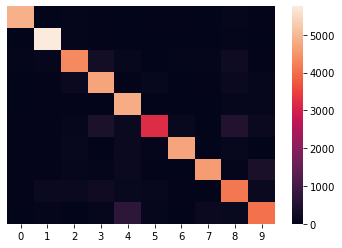

In [100]:
confusion_map = sns.heatmap(confusion_matrix, xticklabels=True, yticklabels=False)

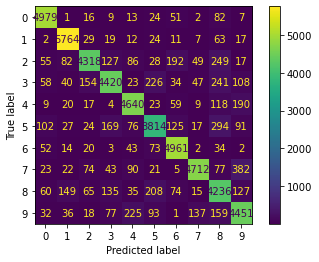

In [89]:
#display confusion matrix using the ConfusionMatrixDisplay function

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(target_array_train, target_array_train_pred)

### StandardScaler